In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
X_train = pd.read_csv('data/X_train_features.csv', dtype={'id':'int',\
                                           'tipodepropiedad':'category',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool'\
                                           }, index_col='id')
y_train = pd.read_csv('data/y_train.csv',header=None,squeeze=True,index_col=0)

In [6]:
y_train_log = np.log1p(y_train)

In [7]:
X_train.shape

(179691, 153)

In [8]:
X_train.head()

,ciudad_0,ciudad_1,ciudad_2,ciudad_3,ciudad_4,ciudad_5,ciudad_6,ciudad_7,ciudad_8,ciudad_9,...,metroscubiertos_std,metroscubiertos_min,metroscubiertos_max,metroscubiertos_median,metrostotales_sum,metrostotales_mean,metrostotales_std,metrostotales_min,metrostotales_max,metrostotales_median
id,,,,,,,,,,,,,,,,,,,,,
120542,0,0,0,1,1,0,1,0,0,1,...,94.519777,15.0,439.0,164.0,3.177166e+07,176.812747,83.707915,15.0,439.0,176.812747
11955,0,0,1,1,1,0,0,0,1,0,...,94.519777,15.0,439.0,164.0,3.177166e+07,176.812747,83.707915,15.0,439.0,176.812747
38491,0,0,0,0,1,1,0,1,1,1,...,94.519777,15.0,439.0,164.0,3.177166e+07,176.812747,83.707915,15.0,439.0,176.812747
235712,0,0,0,0,0,1,0,0,1,1,...,94.519777,15.0,439.0,164.0,3.177166e+07,176.812747,83.707915,15.0,439.0,176.812747
273251,0,0,0,1,1,0,0,0,0,0,...,94.519777,15.0,439.0,164.0,3.177166e+07,176.812747,83.707915,15.0,439.0,176.812747


In [9]:
features_50 = pd.read_csv('data/features_importancia_tercera_etapa.csv',index_col=0).head(50)\
            .index.tolist()
features_50

['metroscubiertos',
 'banos',
 'metrostotales',
 'provincia__Distrito Federal',
 'idzona',
 'garages',
 'tipodepropiedad__Apartamento',
 'tipodepropiedad__Terreno',
 'habitaciones',
 'antiguedad',
 'año',
 'dia',
 'tipodepropiedad__Casa',
 'mes',
 'provincia__Edo. de México',
 'ciudad_3',
 'ciudad_2',
 'ciudad_8',
 'ciudad_4',
 'ciudad_9',
 'ciudad_7',
 'ciudad_10',
 'ciudad_5',
 'ciudad_6',
 'provincia__Nuevo León',
 'provincia__Jalisco',
 'tipodepropiedad__Terreno comercial',
 'centroscomercialescercanos',
 'provincia__Yucatán',
 'escuelascercanas',
 'piscina',
 'tipodepropiedad__Casa en condominio',
 'gimnasio',
 'tipodepropiedad__Edificio',
 'provincia__Querétaro',
 'tipodepropiedad__Local Comercial',
 'provincia__San luis Potosí',
 'provincia__Puebla',
 'provincia__Durango',
 'provincia__Coahuila',
 'tipodepropiedad__Oficina comercial',
 'tipodepropiedad__Bodega comercial',
 'provincia__Morelos',
 'usosmultiples',
 'provincia__Sonora',
 'provincia__Chihuahua',
 'provincia__Veracru

In [10]:
X_train = X_train[features_50]

In [14]:
X_train['precio_log'] = y_train_log

Text(0.5, 1, 'Correlación variables')

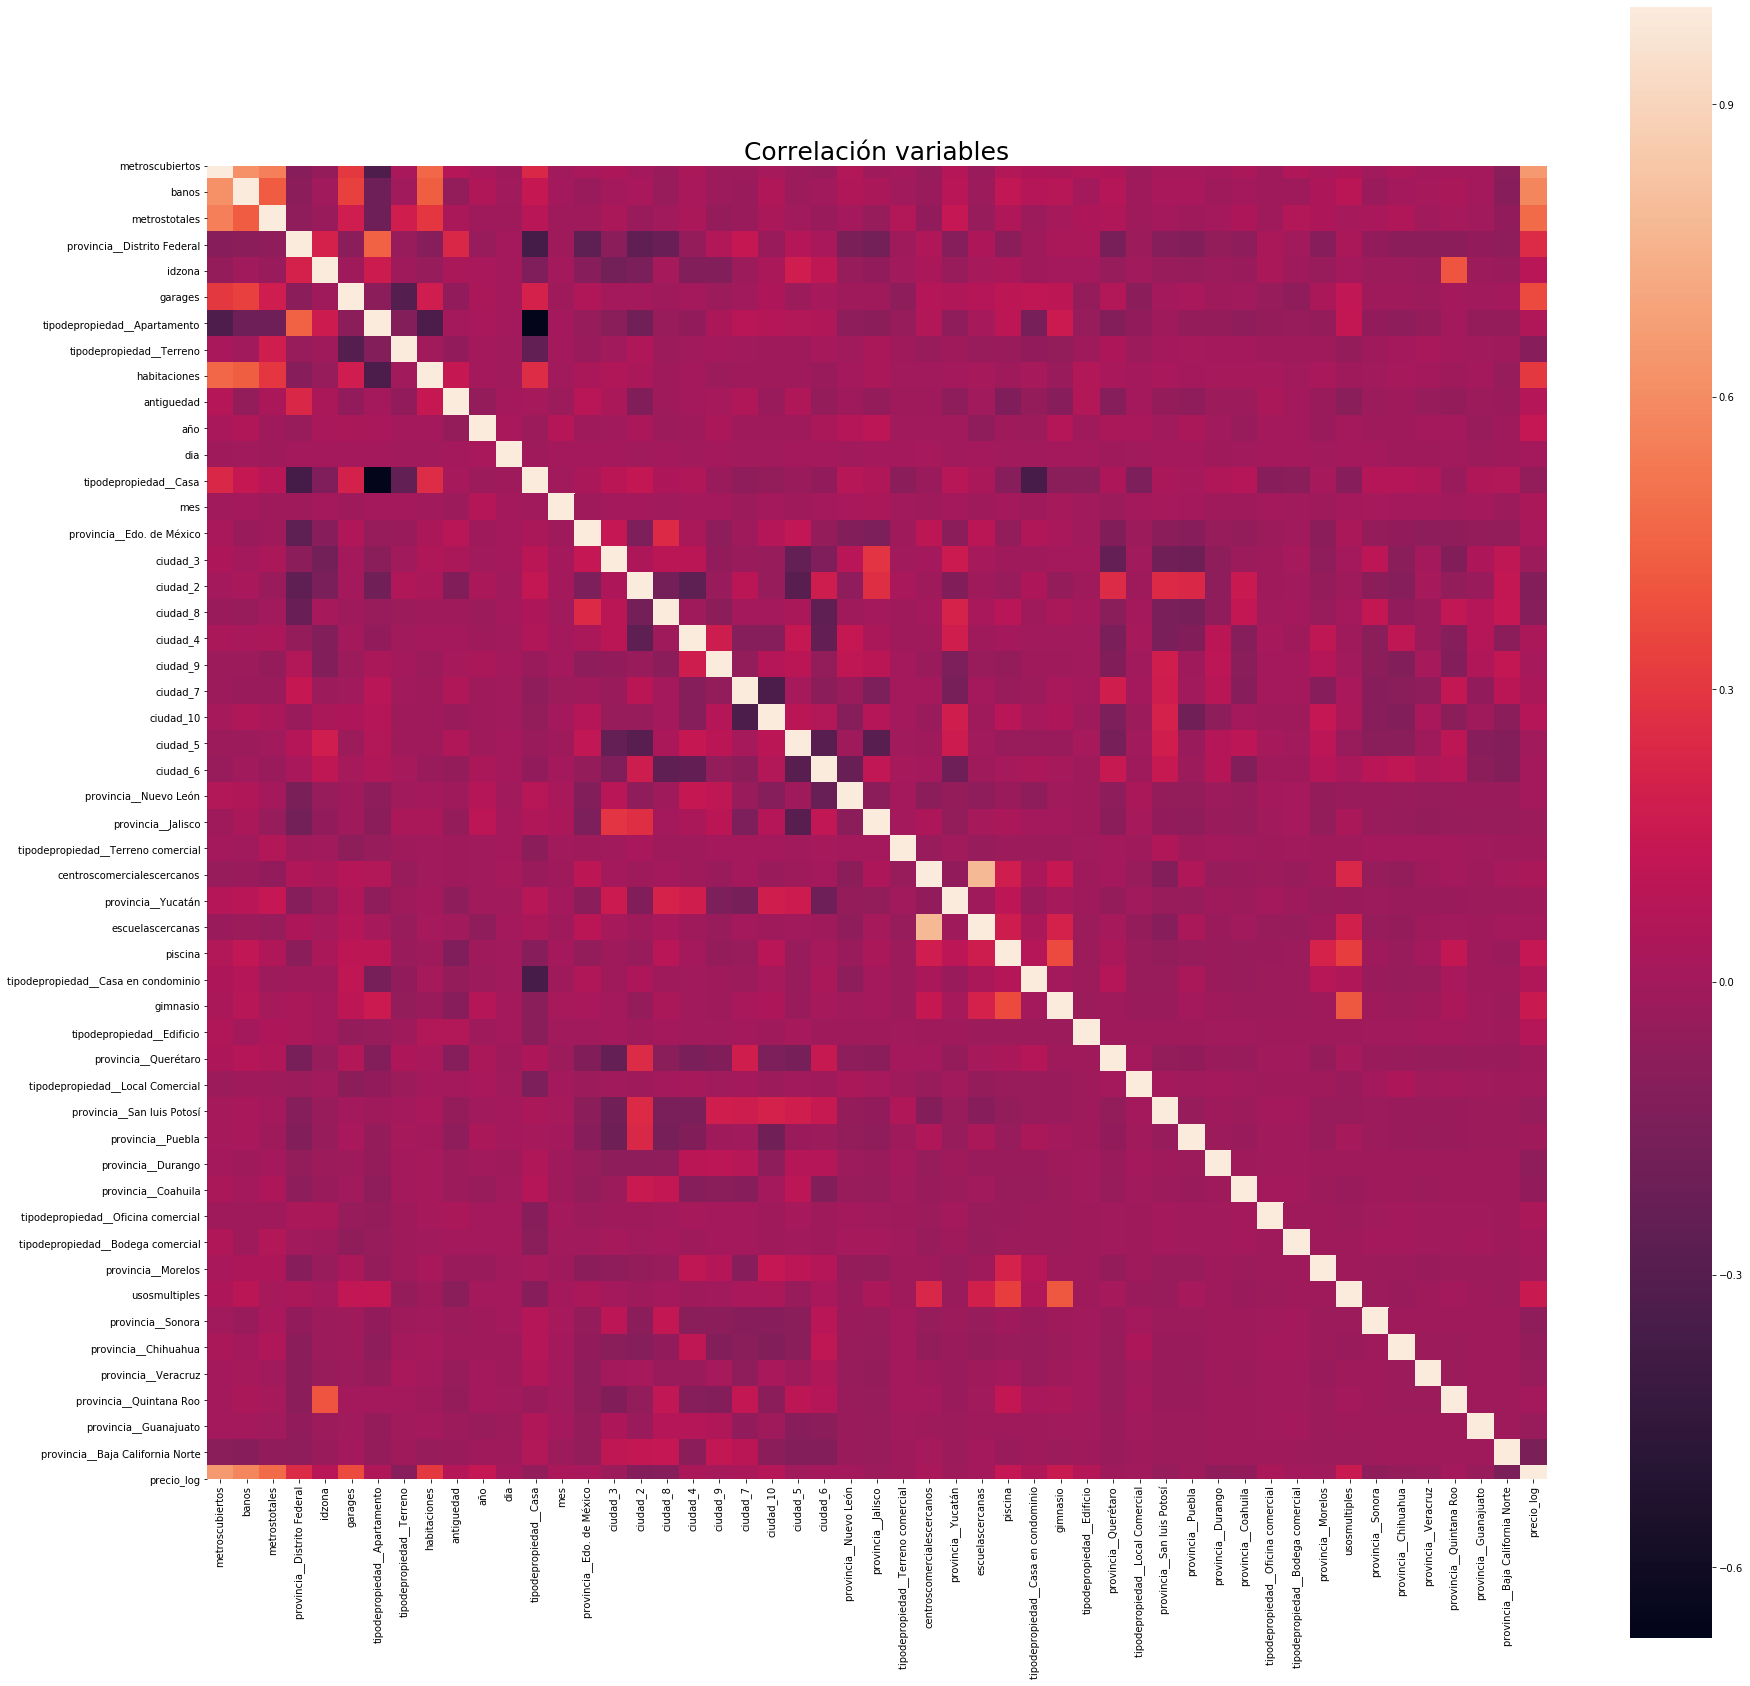

In [15]:
# Matriz de correlaciones como heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(X_train.corr(), square=True, annot=False, fmt='.2f');
plt.title('Correlación variables',size=25)
#plt.savefig('corr_variables', bbox_inches = 'tight')

In [17]:
X_train.corr()['precio_log'].sort_values(ascending=False)

precio_log                             1.000000
metroscubiertos                        0.647294
banos                                  0.580791
metrostotales                          0.478863
garages                                0.369788
habitaciones                           0.305986
provincia__Distrito Federal            0.251913
gimnasio                               0.155870
usosmultiples                          0.152913
año                                    0.136780
piscina                                0.133579
idzona                                 0.088002
tipodepropiedad__Edificio              0.077322
ciudad_10                              0.070046
antiguedad                             0.066939
tipodepropiedad__Apartamento           0.053649
tipodepropiedad__Casa en condominio    0.053174
ciudad_4                               0.033953
ciudad_7                               0.032403
mes                                    0.029691
centroscomercialescercanos             0